In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
! pip install py_thesaurus

In [3]:
! pip install gensim

In [4]:
import numpy as np
import pandas as pd
from py_thesaurus import Thesaurus
import re, string, unidecode
from sklearn.metrics import accuracy_score

# Data Preprocessing

In [5]:
bad_words = pd.read_csv('bad-words.csv')
df1 = pd.read_csv('labeled_data.csv')
df2 = pd.read_csv('train.csv')

In [6]:
df1.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [7]:
df2.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [8]:
df1.shape

(24783, 7)

In [9]:
df2.shape

(59572, 8)

In [10]:
df1 = df1[df1['class'] != 2]

In [11]:
arr = []
for row in df2.iloc[:, :].values:
    if row[2] + row[3] + row[4] >= 1:
        arr.append(1)
    else:
        arr.append(0)

df2['class'] = arr

In [12]:
df1.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."


In [13]:
df2.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,class
0,1731fcac2661469b,Stop removing matter from Talk:Permanent makeu...,0,0,0,0,0,0,0
1,173558f5c2a8883b,I think she meets Notability guidelines and th...,0,0,0,0,0,0,0
2,17359f940f219872,"""\n\n Nice tavern article \n\nArticles like th...",0,0,0,0,0,0,0
3,173693e634e1a6cf,MfD nomination of User:Wikitrevor/Sandbox\n. Y...,0,0,0,0,0,0,0
4,17375e3fff2d9d1a,I am not speaking of sales. I am speaking of p...,0,0,0,0,0,0,0


In [14]:
df2['class'].unique()

array([0, 1], dtype=int64)

In [15]:
df1.rename(columns = {'tweet':'comment_text'}, inplace = True)
df1.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'comment_text'],
      dtype='object')

In [16]:
contractions_dict = {
	"ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
}

In [17]:
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [18]:
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [19]:
import nltk
from nltk.util import pr
from nltk.tokenize import word_tokenize      #to divide strings into lists of substrings.
from nltk.corpus import stopwords            #to filterout useless data
stopword = set(stopwords.words('english'))
nltk.download('punkt')

def clean(text):
    text = expand_contractions(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r"\@w+|\#",'',text)
    text = re.sub(r"[^\w\s]",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = unidecode.unidecode(text)
    tweet_tokens = word_tokenize(text)
    filtered_tweets=[w for w in tweet_tokens if not w in stopword] #removing stopwords
    return " ".join(filtered_tweets)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SANYAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
df1['comment_text'] = df1['comment_text'].apply(clean)
df2['comment_text'] = df2['comment_text'].apply(clean)

In [21]:
df1.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,comment_text
1,1,3,0,3,0,1,rt boy dats coldtyga dwn bad cuffin dat hoe place
2,2,3,0,3,0,1,rt urkindofbrand dawg rt ever fuck bitch start...
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...
5,5,3,1,2,0,1,tmadisonx shit blows meclaim faithful somebody...


In [22]:
df2.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,class
0,1731fcac2661469b,stop removing matter talkpermanent makeup edit...,0,0,0,0,0,0,0
1,173558f5c2a8883b,think meets notability guidelines thanks creat...,0,0,0,0,0,0,0
2,17359f940f219872,nice tavern article articles like joy wikipedi...,0,0,0,0,0,0,0
3,173693e634e1a6cf,mfd nomination userwikitrevorsandbox opinions ...,0,0,0,0,0,0,0
4,17375e3fff2d9d1a,speaking sales speaking percentage much harder...,0,0,0,0,0,0,0


# Dataset-1 Classification - Tfid + LSA

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_1, y_test_1 = train_test_split(df1['comment_text'], df1['class'], test_size=0.2, random_state=0)

In [24]:
# Tfid Vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1 = TfidfVectorizer(max_features=5000)
X_train = vectorizer1.fit_transform(X_train).toarray()
X_test = vectorizer1.transform(X_test).toarray()

vocab_size = len(vectorizer1.vocabulary_)

In [25]:
# LSA (Latent semantic analysis)
from time import time
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

lsa1 = make_pipeline(TruncatedSVD(n_components=300), Normalizer(copy=False))
t0 = time()
X_train = lsa1.fit_transform(X_train)
X_test = lsa1.transform(X_test)
explained_variance = lsa1[0].explained_variance_ratio_.sum()

print(f"LSA done in {time() - t0:.3f} s")
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

LSA done in 19.749 s
Explained variance of the SVD step: 44.7%


In [26]:
X_train.shape

(16496, 300)

SVC

In [27]:
# from sklearn.svm import SVC

# for c in range(1, 100, 10):
#     model = SVC(kernel='linear', C=c)
#     model.fit(X_train, y_train)
#     print(c, "Accuracy: ", np.mean(model.predict(X_test) == y_test))

In [28]:
from sklearn.svm import SVC

svc1 = SVC(kernel='linear', C=11)
svc1.fit(X_train, y_train_1)

SVC(C=11, kernel='linear')

Random Forest

In [29]:
# from sklearn.ensemble import RandomForestClassifier

# n_estimators = [200, 300, 500]
# max_depth = [3, 4, 5]
# criterion= ["gini", "entropy"]

# for c in criterion:
#     for n in n_estimators:
#         for m in max_depth:
#             model = RandomForestClassifier(criterion = c, n_estimators = n, max_depth = m, random_state=0)
#             model.fit(X_train, y_train)
#             print(c, n, m, "Accuracy: ", np.mean(model.predict(X_test) == y_test))

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(criterion="entropy", n_estimators=200, max_depth=3, random_state=42)
rf1.fit(X_train, y_train_1)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200,
                       random_state=42)

XG Boost

In [31]:
# from xgboost import XGBClassifier

# learning_rate = [0.1, 0.2, 0.3]
# n_estimators = [200, 300, 500]
# max_depth= [3, 4, 5]

# for l in learning_rate:
#     for n in n_estimators:
#         for m in max_depth:
#             model = XGBClassifier(learning_rate = l, n_estimators = n, max_depth = m, random_state=0)
#             model.fit(X_train, y_train)
#             print(l, n, m, "Accuracy: ", np.mean(model.predict(X_test) == y_test))

In [32]:
from xgboost import XGBClassifier

xgb1 = XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 3, random_state=0)
xgb1.fit(X_train, y_train_1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [33]:
svc_pred1 = svc1.predict(X_test)
rf_pred1 = rf1.predict(X_test)
xgb_pred1 = xgb1.predict(X_test)

In [34]:
print("Accuracy of SVC: ", np.mean(svc_pred1 == y_test_1))
print("Accuracy of RF: ", np.mean(rf_pred1 == y_test_1))
print("Accuracy of XGB: ", np.mean(xgb_pred1 == y_test_1))

Accuracy of SVC:  0.9350145489815713
Accuracy of RF:  0.9342870999030067
Accuracy of XGB:  0.9398642095053347


Hybrid models

In [35]:
from sklearn.ensemble import StackingClassifier

estimators = [('svc', svc1), ('xgb', xgb1)]
svc_xgb_1 = StackingClassifier(estimators=estimators, final_estimator=xgb1)

# Train the hybrid model
svc_xgb_1.fit(X_train, y_train_1)

# Make predictions
svc_xgb_pred_1 = svc_xgb_1.predict(X_test)

# Evaluate the hybrid model
accuracy = accuracy_score(y_test_1, svc_xgb_pred_1)
print(f"Accuracy of the hybrid (SVC+XGB) model: {accuracy:.6f}")

Accuracy of the hybrid (SVC+XGB) model: 0.936954


In [36]:
from sklearn.ensemble import StackingClassifier

estimators = [('rf', rf1), ('xgb', xgb1)]
rf_xgb_1 = StackingClassifier(estimators=estimators, final_estimator=xgb1)

# Train the hybrid model
rf_xgb_1.fit(X_train, y_train_1)

# Make predictions
rf_xgb_pred_1 = rf_xgb_1.predict(X_test)

# Evaluate the hybrid model
accuracy = accuracy_score(y_test_1, rf_xgb_pred_1)
print(f"Accuracy of the hybrid (RF+SGB) model: {accuracy:.6f}")

Accuracy of the hybrid (RF+SGB) model: 0.936227


In [37]:
from sklearn.ensemble import StackingClassifier

estimators = [('svc', svc1), ('rf', rf1)]
svc_rf_1 = StackingClassifier(estimators=estimators, final_estimator=rf1)

# Train the hybrid model
svc_rf_1.fit(X_train, y_train_1)

# Make predictions
svc_rf_pred_1 = svc_rf_1.predict(X_test)

# Evaluate the hybrid model
accuracy = accuracy_score(y_test_1, svc_rf_pred_1)
print(f"Accuracy of the hybrid (SVC+RF) model: {accuracy:.6f}")

Accuracy of the hybrid (SVC+RF) model: 0.935742


# Dataset-2 Classification - Tfid + LSA

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_2, y_test_2 = train_test_split(df2['comment_text'], df2['class'], test_size=0.2, random_state=0)

In [39]:
# Tfid Vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer2 = TfidfVectorizer(max_features=5000)
X_train = vectorizer2.fit_transform(X_train).toarray()
X_test = vectorizer2.transform(X_test).toarray()

vocab_size = len(vectorizer2.vocabulary_)

In [40]:
# LSA (Latent semantic analysis)
from time import time
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

lsa2 = make_pipeline(TruncatedSVD(n_components=300), Normalizer(copy=False))
t0 = time()
X_train = lsa2.fit_transform(X_train)
X_test = lsa2.transform(X_test)
explained_variance = lsa2[0].explained_variance_ratio_.sum()

print(f"LSA done in {time() - t0:.3f} s")
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

LSA done in 90.610 s
Explained variance of the SVD step: 34.4%


In [41]:
X_train.shape

(47657, 300)

SVC

In [42]:
# from sklearn.svm import SVC

# for c in range(1, 100, 10):
#     model = SVC(kernel='linear', C=c)
#     model.fit(X_train, y_train)
#     print(c, "Accuracy: ", np.mean(model.predict(X_test) == y_test))

In [43]:
from sklearn.svm import SVC

svc2 = SVC(kernel='linear', C=11)
svc2.fit(X_train, y_train_2)

SVC(C=11, kernel='linear')

Random Forest

In [44]:
# from sklearn.ensemble import RandomForestClassifier

# n_estimators = [200, 300, 500]
# max_depth = [3, 4, 5]
# criterion= ["gini", "entropy"]

# for c in criterion:
#     for n in n_estimators:
#         for m in max_depth:
#             model = RandomForestClassifier(criterion = c, n_estimators = n, max_depth = m, random_state=0)
#             model.fit(X_train, y_train)
#             print(c, n, m, "Accuracy: ", np.mean(model.predict(X_test) == y_test))

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(criterion="gini", n_estimators=200, max_depth=5, random_state=42)
rf2.fit(X_train, y_train_2)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

XG Boost

In [46]:
# from xgboost import XGBClassifier

# learning_rate = [0.1, 0.2, 0.3]
# n_estimators = [200, 300, 500]
# max_depth= [3, 4, 5]

# for l in learning_rate:
#     for n in n_estimators:
#         for m in max_depth:
#             model = XGBClassifier(learning_rate = l, n_estimators = n, max_depth = m, random_state=0)
#             model.fit(X_train, y_train)
#             print(l, n, m, "Accuracy: ", np.mean(model.predict(X_test) == y_test))

In [47]:
from xgboost import XGBClassifier

xgb2 = XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 5, random_state=0)
xgb2.fit(X_train, y_train_2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [48]:
svc_pred2 = svc2.predict(X_test)
rf_pred2 = rf2.predict(X_test)
xgb_pred2 = xgb2.predict(X_test)

In [49]:
print("Accuracy of SVC: ", np.mean(svc_pred2 == y_test_2))
print("Accuracy of RF: ", np.mean(rf_pred2 == y_test_2))
print("Accuracy of XGB: ", np.mean(xgb_pred2 == y_test_2))

Accuracy of SVC:  0.9480486781368024
Accuracy of RF:  0.9129668485102812
Accuracy of XGB:  0.9456147712966848


Hybrid models

In [50]:
from sklearn.ensemble import StackingClassifier

estimators = [('svc', svc2), ('xgb', xgb2)]
svc_xgb_2 = StackingClassifier(estimators=estimators, final_estimator=xgb2)

# Train the hybrid model
svc_xgb_2.fit(X_train, y_train_2)

# Make predictions
svc_xgb_pred_2 = svc_xgb_2.predict(X_test)

# Evaluate the hybrid model
accuracy = accuracy_score(y_test_2, svc_xgb_pred_2)
print(f"Accuracy of the hybrid (SVC+XGB) model: {accuracy:.6f}")

Accuracy of the hybrid (SVC+XGB) model: 0.949643


In [51]:
from sklearn.ensemble import StackingClassifier

estimators = [('rf', rf2), ('xgb', xgb2)]
rf_xgb_2 = StackingClassifier(estimators=estimators, final_estimator=xgb2)

# Train the hybrid model
rf_xgb_2.fit(X_train, y_train_2)

# Make predictions
rf_xgb_pred_2 = rf_xgb_2.predict(X_test)

# Evaluate the hybrid model
accuracy = accuracy_score(y_test_2, rf_xgb_pred_2)
print(f"Accuracy of the hybrid (RF+XGB) model: {accuracy:.6f}")

Accuracy of the hybrid (RF+XGB) model: 0.946034


In [52]:
from sklearn.ensemble import StackingClassifier

estimators = [('svc', svc2), ('rf', rf2)]
svc_rf_2 = StackingClassifier(estimators=estimators, final_estimator=rf2)

# Train the hybrid model
svc_rf_2.fit(X_train, y_train_2)

# Make predictions
svc_rf_pred_2 = svc_rf_2.predict(X_test)

# Evaluate the hybrid model
accuracy = accuracy_score(y_test_2, svc_rf_pred_2)
print(f"Accuracy of the hybrid (SVC+RF) model: {accuracy:.6f}")

Accuracy of the hybrid (SVC+RF) model: 0.950147


In [54]:
predictions = {}

predictions['svc_pred1'] = svc_pred1
predictions['xgb_pred1'] = xgb_pred1
predictions['rf_pred1'] = rf_pred1
predictions['svc_pred2'] = svc_pred2
predictions['xgb_pred2'] = xgb_pred2
predictions['rf_pred2'] = rf_pred2

predictions['svc_xgb_1'] = svc_xgb_pred_1
predictions['rf_xgb_pred_1'] = rf_xgb_pred_1
predictions['svc_rf_pred_1'] = svc_rf_pred_1
predictions['svc_xgb_2'] = svc_xgb_pred_2
predictions['rf_xgb_pred_2'] = rf_xgb_pred_2
predictions['svc_rf_pred_2'] = svc_rf_pred_2

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

for pred in predictions.keys():
    if pred.endswith('2'):
        y_pred = predictions[pred]
        print(pred, "/n")
        precision = precision_score(y_test_2, y_pred)
        recall = recall_score(y_test_2, y_pred)
        f1 = f1_score(y_test_2, y_pred)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-Score:", f1)
        mae = mean_absolute_error(y_test_2, y_pred)
        mse = mean_squared_error(y_test_2, y_pred)
        print("Mean Absolute Error:", mae)
        print("Mean Squared Error:", mse)
        r2 = r2_score(y_test_2, y_pred)
        print("R2 Score:", r2, "/n/n")
    else:
        y_pred = predictions[pred]
        print(pred, "/n")
        precision = precision_score(y_test_1, y_pred)
        recall = recall_score(y_test_1, y_pred)
        f1 = f1_score(y_test_1, y_pred)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-Score:", f1)
        mae = mean_absolute_error(y_test_1, y_pred)
        mse = mean_squared_error(y_test_1, y_pred)
        print("Mean Absolute Error:", mae)
        print("Mean Squared Error:", mse)
        r2 = r2_score(y_test_1, y_pred)
        print("R2 Score:", r2, "/n/n")

svc_pred1 /n
Precision: 0.9356014580801945
Recall: 0.9992213859330392
F1-Score: 0.9663654618473897
Mean Absolute Error: 0.06498545101842872
Mean Squared Error: 0.06498545101842872
R2 Score: -0.058486079280725356 /n/n
xgb_pred1 /n
Precision: 0.9467162329615861
Recall: 0.9914352452634311
F1-Score: 0.9685598377281947
Mean Absolute Error: 0.06013579049466537
Mean Squared Error: 0.06013579049466537
R2 Score: 0.020505419173060035 /n/n
rf_pred1 /n
Precision: 0.9342870999030067
Recall: 1.0
F1-Score: 0.9660273285696377
Mean Absolute Error: 0.06571290009699321
Mean Squared Error: 0.06571290009699321
R2 Score: -0.07033480404879322 /n/n
svc_pred2 /n
Precision: 0.9178082191780822
Recall: 0.5162671232876712
F1-Score: 0.6608219178082191
Mean Absolute Error: 0.05195132186319765
Mean Squared Error: 0.05195132186319765
R2 Score: 0.4124367775142094 /n/n
xgb_pred2 /n
Precision: 0.8768115942028986
Recall: 0.5179794520547946
F1-Score: 0.651237890204521
Mean Absolute Error: 0.05438522870331515
Mean Squared E

In [63]:
# predictions = {}

# predictions['svc_pred1'] = svc_pred1
# predictions['xgb_pred1'] = xgb_pred1
# predictions['rf_pred1'] = rf_pred1
# predictions['svc_pred2'] = svc_pred2
# predictions['xgb_pred2'] = xgb_pred2
# predictions['rf_pred2'] = rf_pred2

# predictions['svc_xgb_1'] = svc_xgb_pred_1
# predictions['rf_xgb_pred_1'] = rf_xgb_pred_1
# predictions['svc_rf_pred_1'] = svc_rf_pred_1
# predictions['svc_xgb_2'] = svc_xgb_pred_2
# predictions['rf_xgb_pred_2'] = rf_xgb_pred_2
# predictions['svc_rf_pred_2'] = svc_rf_pred_2

# from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.metrics import r2_score

# for pred in predictions.keys():
#     if pred.endswith('2'):
#         y_pred = predictions[pred]
#         print(pred, "/n")
#         precision = precision_score(y_train_2, y_pred)
#         recall = recall_score(y_train_2, y_pred)
#         f1 = f1_score(y_train_2, y_pred)
#         print("Precision:", precision)
#         print("Recall:", recall)
#         print("F1-Score:", f1)
#         mae = mean_absolute_error(y_train_2, y_pred)
#         mse = mean_squared_error(y_train_2, y_pred)
#         print("Mean Absolute Error:", mae)
#         print("Mean Squared Error:", mse)
#         r2 = r2_score(y_train_2, y_pred)
#         print("R2 Score:", r2, "/n/n")
#     else:
#         y_pred = predictions[pred]
#         print(pred, "/n")
#         precision = precision_score(y_train_1, y_pred)
#         recall = recall_score(y_train_1, y_pred)
#         f1 = f1_score(y_train_1, y_pred)
#         print("Precision:", precision)
#         print("Recall:", recall)
#         print("F1-Score:", f1)
#         mae = mean_absolute_error(y_train_1, y_pred)
#         mse = mean_squared_error(y_train_1, y_pred)
#         print("Mean Absolute Error:", mae)
#         print("Mean Squared Error:", mse)
#         r2 = r2_score(y_train_1, y_pred)
#         print("R2 Score:", r2, "/n/n")

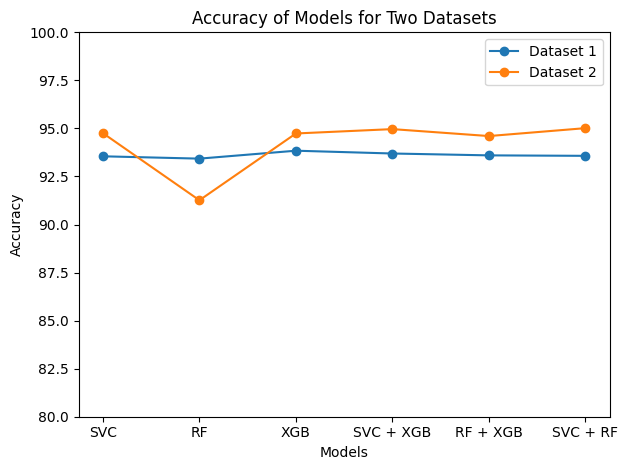

In [2]:
import matplotlib.pyplot as plt

dataset1_accuracies = [93.54995150339476, 93.42870999030067, 93.84093113482056, 93.6954, 93.5984, 93.5742]
dataset2_accuracies = [94.75451112043642, 91.26311372219891, 94.73772555602182, 94.9643, 94.6034, 95.0147]

models = ['SVC', 'RF', 'XGB', 'SVC + XGB', 'RF + XGB', 'SVC + RF']

fig, ax = plt.subplots()

ax.plot(models, dataset1_accuracies, marker='o', label='Dataset 1')
ax.plot(models, dataset2_accuracies, marker='o', label='Dataset 2')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Models for Two Datasets')
ax.legend()

plt.ylim(80, 100)

plt.savefig("Accuracy-plot.png", bbox_inches='tight')

plt.tight_layout()
plt.show()

# NLP

In [56]:
bad_words.head()

,words
0,jigaboo
1,mound of venus
2,asslover
3,s&m
4,queaf


In [57]:
bad_words_list = list(bad_words['words'])

In [58]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SANYAM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
from nltk.corpus import wordnet

def syn_word(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lm in syn.lemmas():
            if lm.name() not in bad_words_list or lm.name() != word:
                synonyms.append(lm.name())
    return synonyms

In [60]:
prompt = input('Enter the text: ')

Enter the text: This is a fucking man bullshit noise.


In [61]:
check_prompt = clean(prompt)
check_prompt = vectorizer2.transform([check_prompt])
check_prompt = lsa2.transform(check_prompt)

res = svc_rf_2.predict(check_prompt)

In [62]:
if res == 0:
    print("The text is not having inappropriate words")
else:
    print("Inappropriate words detected")
    print("Generating appropriate words text")
    
    prompt = str(prompt)
    
    for word in prompt.split(' '):
        if word in bad_words_list:
            synonyms = syn_word(word)
            if len(synonyms) == 0:
                prompt = prompt.replace(word, '')
            else:
                prompt = prompt.replace(word, syn_word(word)[-1])
    
    print("Generated text is: ", prompt)

Inappropriate words detected
Generating appropriate words text
Generated text is:  This is a flaming man fake noise.
